In [1]:
!pip install yfinance statsmodels matplotlib pandas scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

/tmp/ipython-input-2-6034116.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df= yf.download('AAPL', start='2020-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


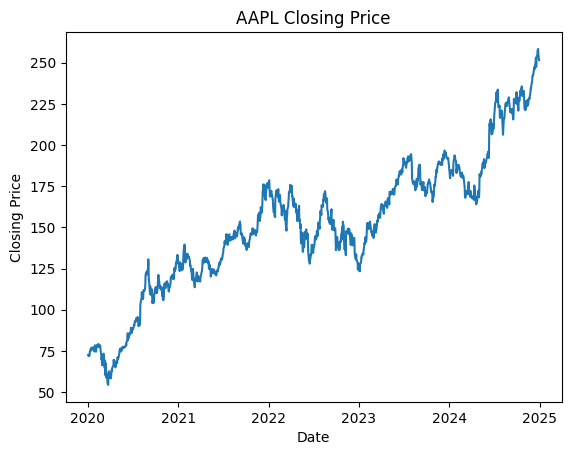

In [2]:
df= yf.download('AAPL', start='2020-01-01', end='2024-12-31')
df=df[['Close']]
df.dropna(inplace=True) #drop missing values
plt.plot(df.Close)
plt.title('AAPL Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [3]:
result = seasonal_decompose(df.Close, model='additive', period=30,) # roughly monthly seasonality


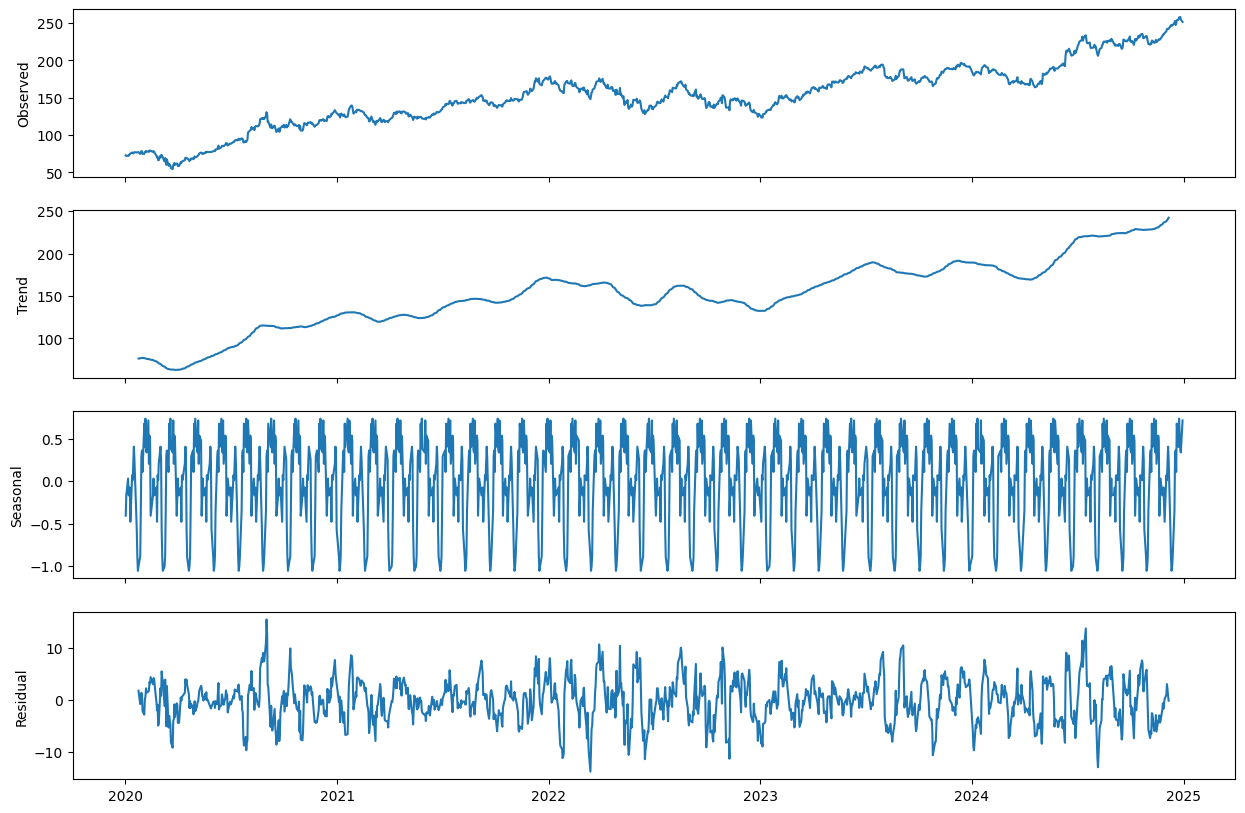

In [4]:
# Plot the decomposed components
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(result.observed)
axes[0].set_ylabel('Observed')

axes[1].plot(result.trend)
axes[1].set_ylabel('Trend')

axes[2].plot(result.seasonal)
axes[2].set_ylabel('Seasonal')

axes[3].plot(result.resid)
axes[3].set_ylabel('Residual')


plt.show()

In [5]:
adf_result=adfuller(df.Close)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

ADF Statistic: -0.6613740471972286
p-value: 0.8565025085214767


In [6]:
#since p>0.05, we need to difference data

df_diff = df.Close.diff().dropna()
adf_result_diff=adfuller(df_diff)
print(f'ADF Statistic: {adf_result_diff[0]}')
print(f'p-value: {adf_result_diff[1]}')


ADF Statistic: -35.934792688239746
p-value: 0.0


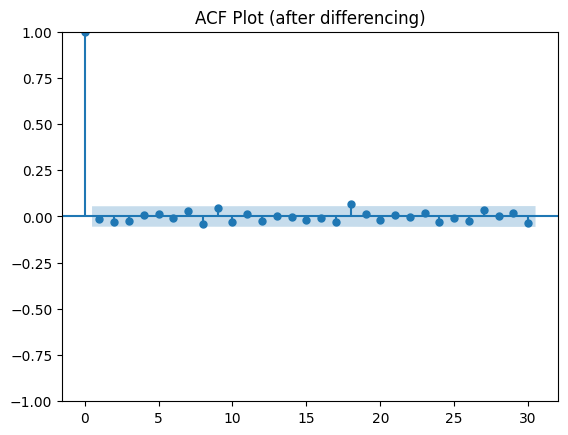

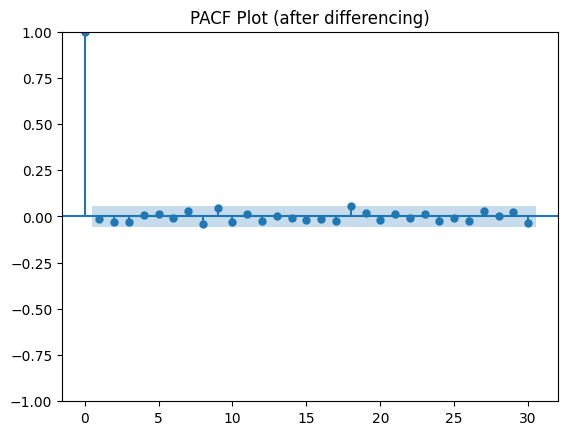

In [7]:
plot_acf(df_diff, lags=30)
plt.title('ACF Plot (after differencing)')
plt.show()

plot_pacf(df_diff, lags=30)
plt.title('PACF Plot (after differencing)')
plt.show()

In [8]:
model=ARIMA(df.Close, order=(1,1,1))
model_fit=model.fit()
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                 1257
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3011.469
Date:                Tue, 22 Jul 2025   AIC                           6028.938
Time:                        10:11:52   BIC                           6044.345
Sample:                             0   HQIC                          6034.729
                               - 1257                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5544      0.669      0.829      0.407      -0.756       1.865
ma.L1         -0.5754      0.660     -0.871      0.384      -1.870       0.719
sigma2         7.0813      0.204     34.743      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


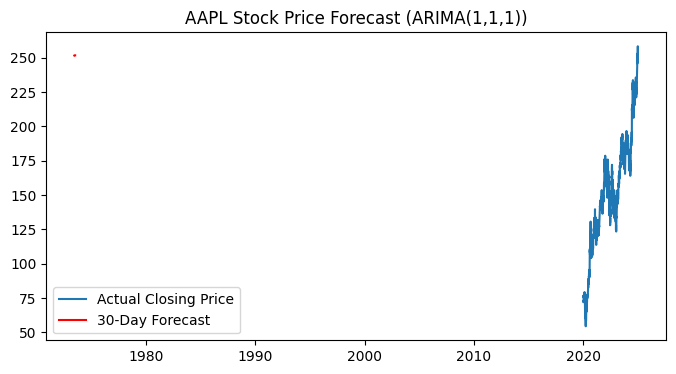

In [9]:
forecast = model_fit.forecast(steps=30)

# Plotting forecast along with actual data
plt.figure(figsize=(8,4))
plt.plot(df.Close, label='Actual Closing Price')
plt.plot(forecast.index, forecast, color='red', label='30-Day Forecast')
plt.title("AAPL Stock Price Forecast (ARIMA(1,1,1))")
plt.legend()
plt.show()


In [10]:
train = df.loc[:'2023-12-31']
test = df.loc['2024-01-01':]
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train.Close, order=(1,1,1))
model_fit = model.fit()

print(model_fit.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                 1006
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2384.689
Date:                Tue, 22 Jul 2025   AIC                           4775.378
Time:                        10:12:08   BIC                           4790.116
Sample:                             0   HQIC                          4780.978
                               - 1006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3903      0.509      0.767      0.443      -0.607       1.388
ma.L1         -0.4323      0.502     -0.861      0.389      -1.416       0.552
sigma2         6.7377      0.227     29.640      0.0

In [19]:
import warnings
warnings.filterwarnings("ignore")

best_rmse = float('inf')
best_order = None

for p in range(0, 4):
    for q in range(0, 4):
        try:
            model = ARIMA(train.Close, order=(p,1,q)).fit()
            forecast = model.forecast(steps=len(test))
            rmse = np.sqrt(mean_squared_error(test.Close, forecast))
            if rmse < best_rmse:
                best_rmse = rmse
                best_order = (p,1,q)
            print(f"ARIMA({p},1,{q}) RMSE: {rmse}")
        except:
            continue

print(f"\nBest ARIMA Order: {best_order} with RMSE: {best_rmse}")


ARIMA(0,1,0) RMSE: 29.57330514059308
ARIMA(0,1,1) RMSE: 29.552076959439752
ARIMA(0,1,2) RMSE: 29.545626928715528
ARIMA(0,1,3) RMSE: 29.542815229143596
ARIMA(1,1,0) RMSE: 29.55345018151333
ARIMA(1,1,1) RMSE: 29.540694839712813
ARIMA(1,1,2) RMSE: 29.54280069422727
ARIMA(1,1,3) RMSE: 29.5888189982226
ARIMA(2,1,0) RMSE: 29.546926157087036
ARIMA(2,1,1) RMSE: 29.542951393962543
ARIMA(2,1,2) RMSE: 29.542129024940454
ARIMA(2,1,3) RMSE: 29.424532242769217
ARIMA(3,1,0) RMSE: 29.54390033040168
ARIMA(3,1,1) RMSE: 29.54312297524827
ARIMA(3,1,2) RMSE: 29.424878121930202
ARIMA(3,1,3) RMSE: 29.644418774098593

Best ARIMA Order: (2, 1, 3) with RMSE: 29.424532242769217


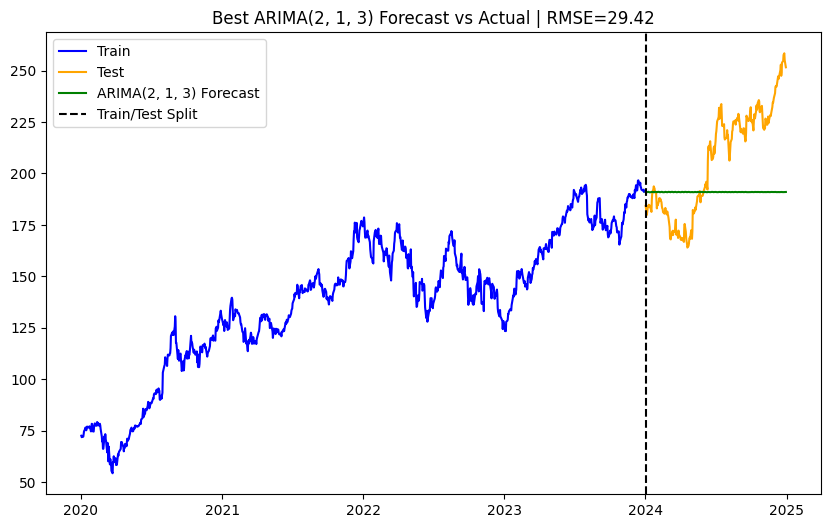

In [20]:
plt.figure(figsize=(10,6))
plt.plot(train.index, train.Close, label='Train', color='blue')
plt.plot(test.index, test.Close, label='Test', color='orange')
plt.plot(test.index, model.forecast(steps=len(test)), label=f'ARIMA{best_order} Forecast', color='green')
plt.axvline(test.index[0], color='black', linestyle='--', label='Train/Test Split')
plt.title(f'Best ARIMA{best_order} Forecast vs Actual | RMSE={best_rmse:.2f}')
plt.legend()
plt.show()
